# Part II - (Loan Data from Prosper Exploration)
## by (Abdulraqib Omotosho)

## Investigation Overview
For the presentation, my objective focused on the exploration of the individual features of interest to discover the relationship between the borrowers and the loans they took and other correlations between various variables in the dataset.
## Dataset Overview
The dataset I will be using for this exploration is the Loan Data from Prosper gotten from [Udacity](https://www.bing.com/ck/a?!&&p=2f927331436966aeJmltdHM9MTY3NzQ1NjAwMCZpZ3VpZD0xMzFhMTkzMi0xYjdmLTYwZTEtMjg3ZC0wODdkMWE2MjYxOTUmaW5zaWQ9NTE3Nw&ptn=3&hsh=3&fclid=131a1932-1b7f-60e1-287d-087d1a626195&psq=udacity&u=a1aHR0cHM6Ly93d3cudWRhY2l0eS5jb20v&ntb=1)’s curated datasets. This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [18]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [19]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [20]:
# Selecting the features of interest
to_use = ['Term', 'LoanStatus', 'StatedMonthlyIncome', 'BorrowerAPR', 'BorrowerRate', 'BorrowerState', 'ProsperScore',
          'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'Occupation', 'DebtToIncomeRatio', 
          'TotalProsperLoans', 'LoanOriginalAmount', 'Investors', 'LoanOriginationDate']
loans = df[to_use]
loans.head()

,Term,LoanStatus,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,BorrowerState,ProsperScore,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,Occupation,DebtToIncomeRatio,TotalProsperLoans,LoanOriginalAmount,Investors,LoanOriginationDate
0,36,Completed,3083.333333,0.16516,0.1580,CO,NaN,0,Self-employed,True,"$25,000-49,999",Other,0.17,NaN,9425,258,2007-09-12 00:00:00
1,36,Current,6125.000000,0.12016,0.0920,CO,7.0,2,Employed,False,"$50,000-74,999",Professional,0.18,NaN,10000,1,2014-03-03 00:00:00
2,36,Completed,2083.333333,0.28269,0.2750,GA,NaN,0,Not available,False,Not displayed,Other,0.06,NaN,3001,41,2007-01-17 00:00:00
3,36,Current,2875.000000,0.12528,0.0974,GA,9.0,16,Employed,True,"$25,000-49,999",Skilled Labor,0.15,NaN,10000,158,2012-11-01 00:00:00
4,36,Current,9583.333333,0.24614,0.2085,MN,4.0,2,Employed,True,"$100,000+",Executive,0.26,1.0,15000,20,2013-09-20 00:00:00


In [21]:
import warnings;warnings.filterwarnings('ignore')
# convert 'LoanOriginationDate' data type to datetime and extract year, month and week from it
loans.LoanOriginationDate = pd.to_datetime(loans.LoanOriginationDate)
loans['Year'] = loans.LoanOriginationDate.dt.year
loans['Month'] = loans.LoanOriginationDate.dt.strftime('%B')
loans['Week'] = loans.LoanOriginationDate.dt.week

#convert the numeric values in the Listing Category to object and change the column data type.
mapping = {0: 'Not available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use',
          6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Enagement Ring', 12: 'Green Loans',
          13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation',
           20: 'Wedding Loans'}

loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].replace(mapping)
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].astype(object)
loans = loans.rename(columns={'ListingCategory (numeric)': 'Listing Category'})

In [22]:
import warnings;warnings.simplefilter(action='ignore')

# convert LoanStatus, EmploymentStatus, and IncomeRange into ordered categorical types
ordinal_var_dict = {
                    'LoanStatus': ['Cancelled', 'Defaulted', 'Past Due (>120 days)', 'Past Due (91-120 days)', 'Past Due (61-90 days)',
                                   'Past Due (31-60 days)', 'Past Due (16-30 days)', 'Past Due (1-15 days)', 'Chargedoff',
                                  'Current', 'FinalPaymentInProgress', 'Completed'],
                    'EmploymentStatus': ['Not available', 'Not employed', 'Self-employed', 'Part-time', 
                                         'Employed', 'Full-time', 'Retired', 'Other'],
                    'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999', '$100,000+']
}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

## Distribution of Loan Status
exploring the statuses of loans that were took.

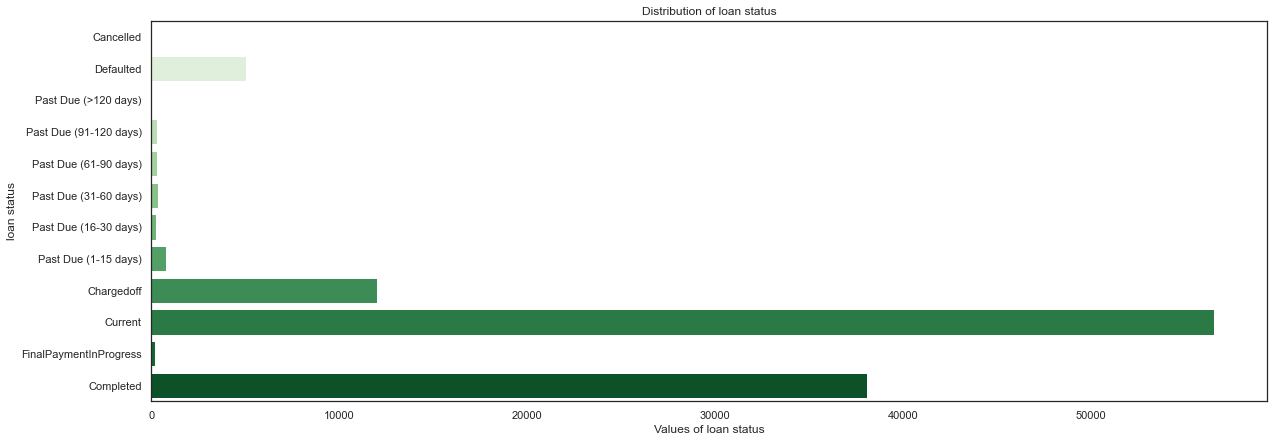

In [23]:
# exploring the statuses of loans that were took.
plot = loans.LoanStatus.value_counts()
x = plot.index
y = plot.values
plt.figure(figsize=[20,7])
sns.barplot(y=plot.index, x=plot.values, palette='Greens').set(xlabel='Values of loan status',
                                                              ylabel='loan status', title='Distribution of loan status')
plt.show();

## Distribution of States
Exploring the distribution of states. It can be seen that the majority of the borrowers originated from California (CA).

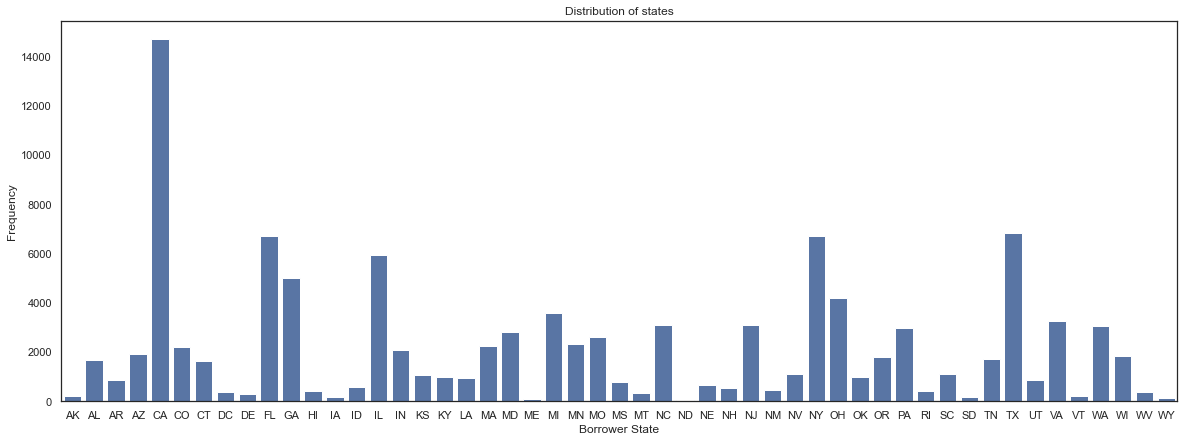

In [24]:
# exploring the distribution of states.
plot = loans.BorrowerState
plot = plot.sort_values(ascending=True)
color = sns.color_palette()[0]
plt.figure(figsize=[20,7])
sns.countplot(plot, color=color).set(xlabel='Borrower State', ylabel='Frequency', title='Distribution of states');

## Distribution of Income Range
Exploring the distribution of Income range. It can be seen that the majority of the borrowers had an income range between $25,000-74,999

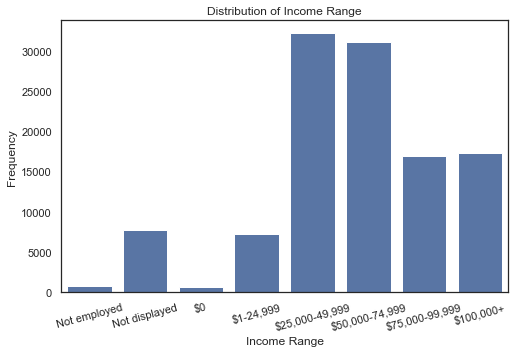

In [25]:
# exploring the Income range of the borrowers
plot = loans.IncomeRange
color = sns.color_palette()[0]
plt.figure(figsize=[8,5])
sns.countplot(plot, color=color).set(xlabel='Income Range', ylabel='Frequency', title='Distribution of Income Range')
plt.xticks(rotation=15);

## Distribution of Employment Status
Exploring the distribution of Employment Status. This distribution shows that the majority of the borrowers are Employed and Full-time.

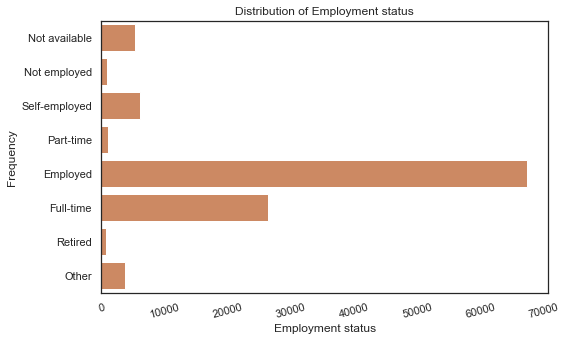

In [26]:
# employment status of the borrowers
plot = loans.EmploymentStatus.value_counts()
x = plot.values
y = plot.index
plt.figure(figsize=[8,5])
color = sns.color_palette()[1]
sns.barplot(x=x, y=y, color=color).set(xlabel='Employment status',
                                      ylabel='Frequency', title='Distribution of Employment status')
plt.xticks(rotation=15);

## Distribution of Stated Monthly Income
Exploring the distribution of Stated Monthly Income. This distribution shows that the stated monthly income of the borrowers is highly positively skewed.

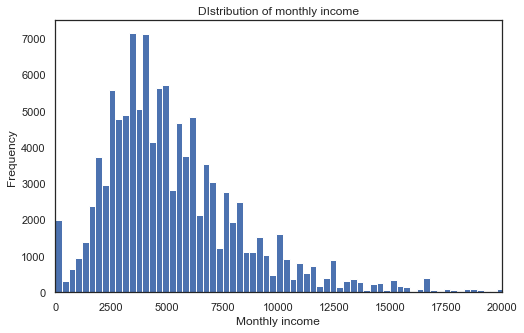

In [27]:
# distribution of monthly income plotted with more bins
bins = np.arange(0, loans.StatedMonthlyIncome.max()+300, 300)
plt.figure(figsize=[8,5])
plt.hist(x=loans.StatedMonthlyIncome, bins=bins)
plt.title('DIstribution of monthly income')
plt.xlabel('Monthly income')
plt.ylabel('Frequency')
plt.xlim(0, 20000);

## Distribution of Listing Category
Exploring the distribution of Listing Category. This distribution shows that the a vast majority applied for debt consolidation loans.

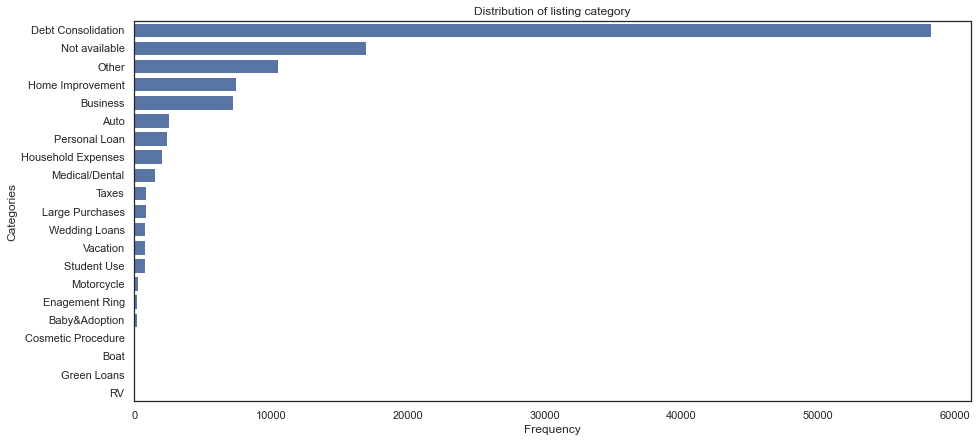

In [28]:
# listing category
plot = loans['Listing Category'].value_counts()
x = plot.index
y = plot.values
color = sns.color_palette()[0]
plt.figure(figsize=[15,7])
sns.barplot(x=y, y=x, color=color, order=x).set(
    title='Distribution of listing category', xlabel='Frequency', ylabel='Categories')
plt.show();

## Correlation between numeric variables in the dataset. 
Exploring the correlation between numeric features in the dataset with the use of an heatmap. The plot shows that BorrowerAPR and BorrowerRate have a very high correlation. Investors also have a correlation of 0.38 with LoanOriginalAmount.

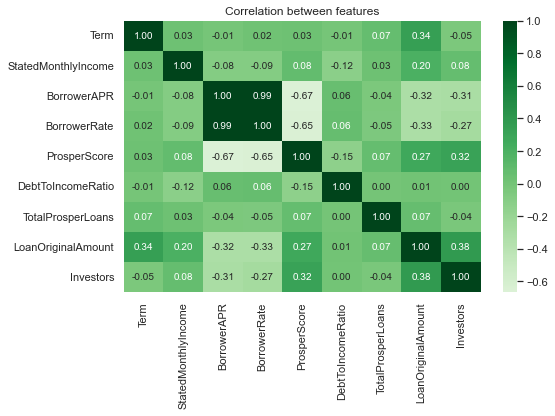

In [29]:
# correlation matrix of numeric variables
numeric_vars = ['Term', 'StatedMonthlyIncome', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 
                'DebtToIncomeRatio', 'TotalProsperLoans', 'LoanOriginalAmount', 'Investors']

plt.figure(figsize=[8,5])
sns.heatmap(loans[numeric_vars].corr(), fmt='.2f', annot=True, cmap='Greens', center=0).set(title='Correlation between features');

## Correlation between years and LoanOriginalAMount
Exploring the correlation between years and LoanOriginalAmount. The distribution shows that there is a positive correlation between Year and LoanOriginalAmount

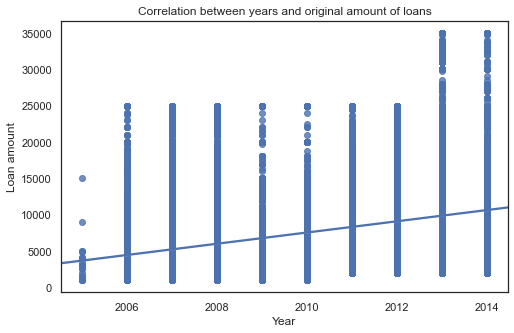

In [30]:
# Correlation between years and original amount of loans
plt.figure(figsize=[8,5])
sns.regplot(data=loans, x='Year', y='LoanOriginalAmount', truncate=False).set(
    title='Correlation between years and original amount of loans', xlabel='Year', ylabel='Loan amount');

## Relationship between BorrowerRate and LoanOriginalAmount
Exploring the relationship between BorrowerRate and LoanOriginalAmount. The distribution shows that the range of BorrowerRate decreases with an increase of loan amount.

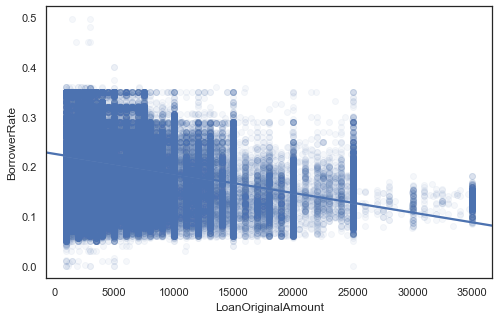

In [31]:
# regplot of BorrowerRate and LoanOriginalAmount
plt.figure(figsize=[8,5])
sns.regplot(data=loans, x='LoanOriginalAmount', y='BorrowerRate', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

## Relationship between TotalProsperLoans Vs Month
Exploring the relationship between TotalProsperLoans Vs Month. From the plot, it can be seen that may is the month with the highest number of loans that were taken while borrowers seldom take loans at the end of the year.

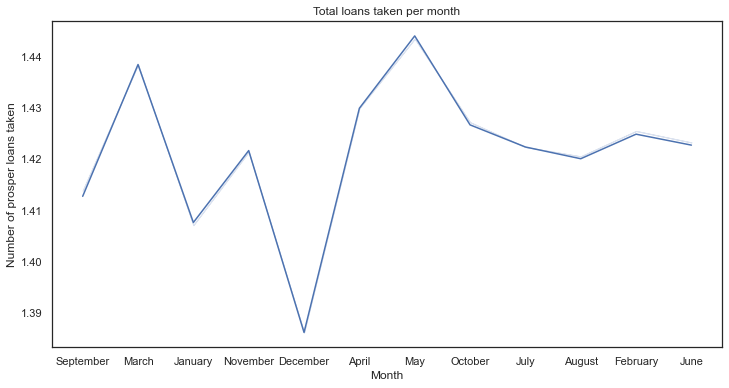

In [32]:
# Relationship between TotalProsperLoans Vs Month
plt.figure(figsize=[12,6])
sns.lineplot(data=loans, x='Month', y='TotalProsperLoans', palette='Blues', ci=0)
plt.title('Total loans taken per month')
plt.xlabel('Month')
plt.ylabel('Number of prosper loans taken');

## Relationship between some Categorical features and Numeric features
Exploring the correlation between EmploymentStatus, IncomeRange, Year and LoanOriginalAmount, BorrowerRate, TotalProsperLoans. From the distribution, IncomeRange and LoanOriginalAMount are positively correlated.

<Figure size 1440x1440 with 0 Axes>

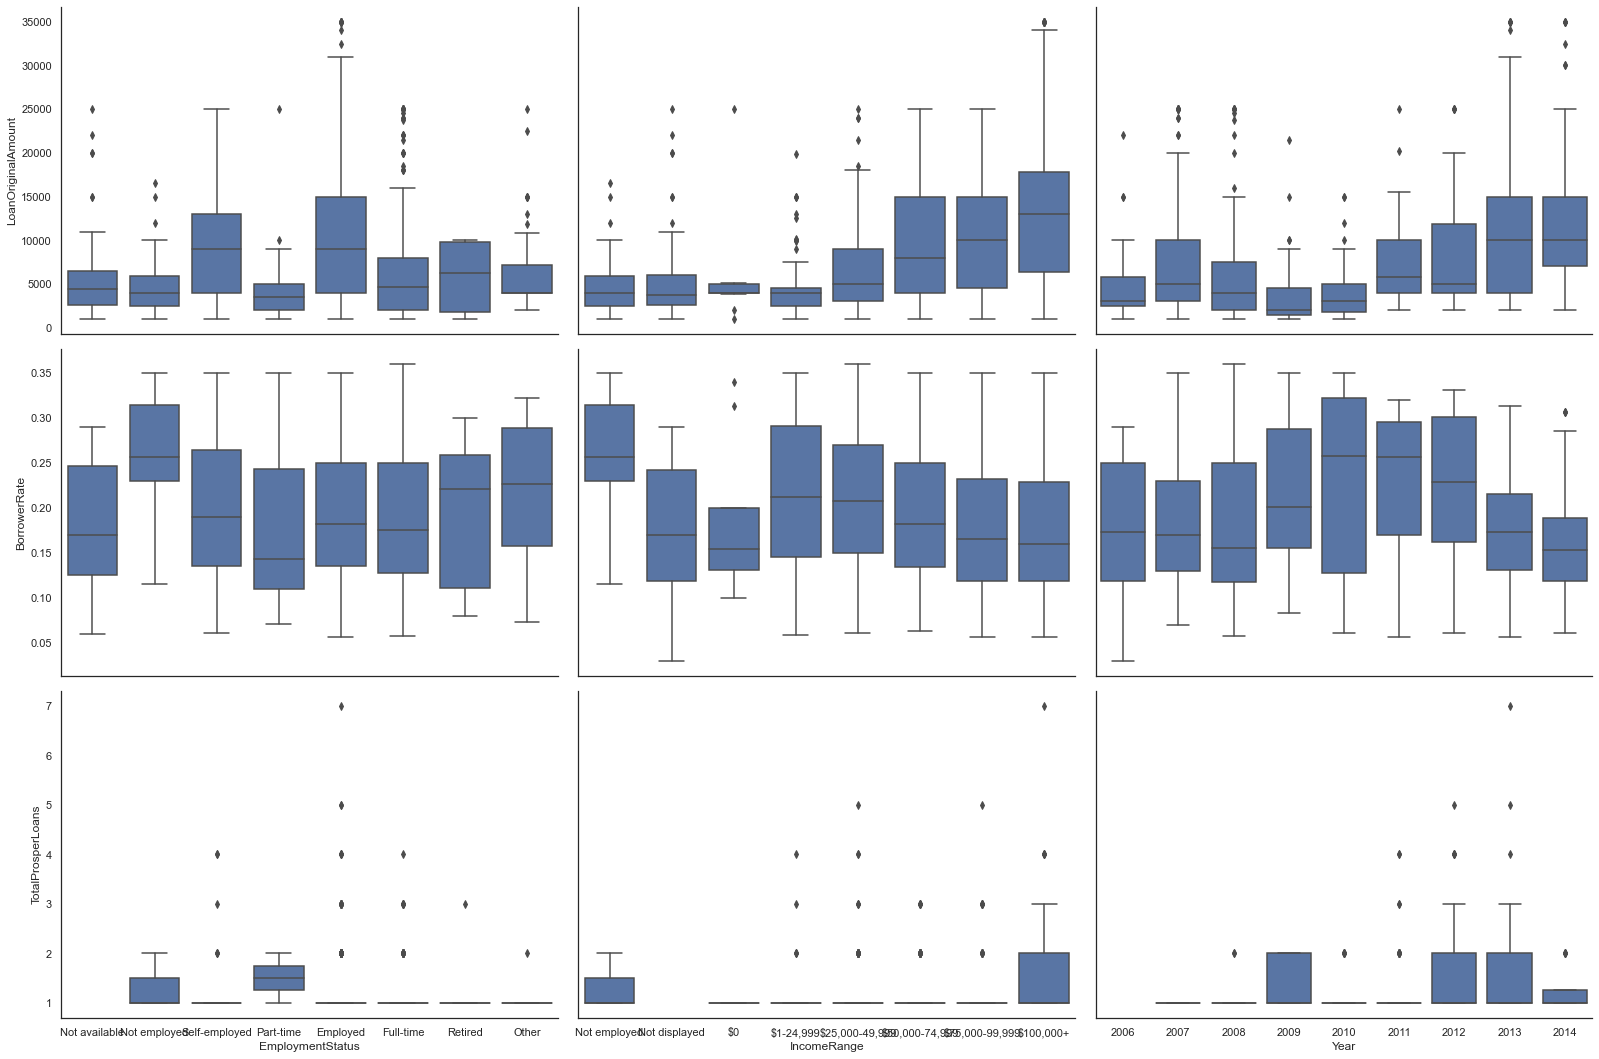

In [33]:
# plot matrix of numeric features against categorical features with only 2000 random samples taken
samples = np.random.choice(loans.shape[0], 2000, replace = False)
loans_samp = loans.loc[samples,:]
cat_vars = ['EmploymentStatus', 'IncomeRange', 'Year']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 20])
g = sns.PairGrid(data = loans_samp, y_vars = ['LoanOriginalAmount', 'BorrowerRate', 'TotalProsperLoans'], x_vars = cat_vars, size=5, aspect=1.5, height=5)
g.map(boxgrid)
plt.show();

In [ ]:
!jupyter nbconvert --to slides --no-input --post serve Part_II_slide_deck_template.ipynb